In [1]:
import pandas as pd #untuk memuat kumpulan data ke dalam DataFrame
import seaborn as sns #untuk visualisasi data dan untuk melakukan analisis data eksplorasi (EDA)
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split #untuk membagi kumpulan data menjadi subset pelatihan dan pengujian
from sklearn.tree import DecisionTreeClassifier #machine learning algorithms yang akan digunakan untuk klasifikasi
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score #metrik untuk mengevaluasi kinerja model
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

In [2]:
# untuk load kumpulan data dari URL web menggunakan pd.read_csv(). Ini akan membaca kumpulan data ke dalam pandas DataFrame
url = "https://raw.githubusercontent.com/chellee18/DataMining/refs/heads/main/week%206%20cancer%20%26%20adult/Breast_Cancer.csv"
df = pd.read_csv(url)

df.sample(10) #Menunjukan 10 data acak


,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
1280,39,Black,Divorced,T1,N2,IIIA,Poorly differentiated,3,Regional,20,Positive,Positive,14,7,51,Alive
2882,69,White,Single,T4,N3,IIIC,Moderately differentiated,2,Regional,80,Positive,Positive,24,23,93,Dead
3889,39,Black,Single,T2,N1,IIB,Poorly differentiated,3,Regional,40,Positive,Positive,14,1,58,Dead
467,40,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,30,Positive,Positive,4,2,9,Alive
2412,45,White,Married,T3,N1,IIIA,Moderately differentiated,2,Regional,75,Positive,Positive,14,2,65,Alive
2006,65,White,Married,T3,N2,IIIA,Moderately differentiated,2,Regional,56,Positive,Negative,14,7,87,Alive
3687,57,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,30,Positive,Positive,17,3,83,Alive
2705,53,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,27,Positive,Positive,21,1,54,Alive
1899,43,Black,Single,T2,N1,IIB,Poorly differentiated,3,Regional,39,Positive,Positive,27,3,69,Alive
1982,58,White,Married,T2,N1,IIB,Well differentiated,1,Regional,24,Positive,Positive,3,1,75,Alive


In [3]:
#untuk melihat gambaran umum dari dataset yang digunakan

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [4]:
df.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


In [5]:
print(df.columns)

Index(['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')


In [14]:
df.columns = df.columns.str.strip()

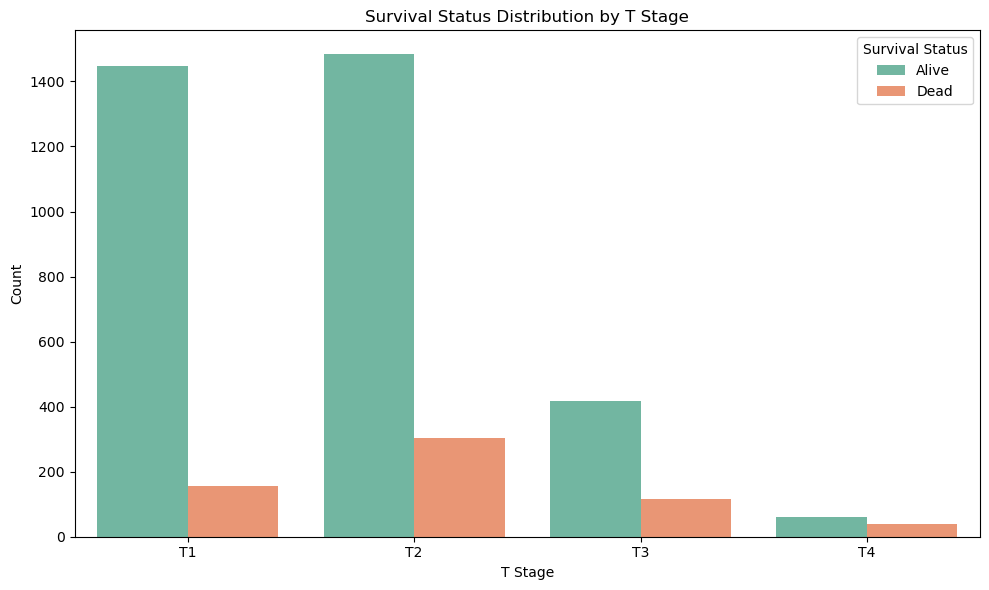

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='T Stage', hue='Status', palette='Set2')
plt.title('Survival Status Distribution by T Stage')
plt.xlabel('T Stage')
plt.ylabel('Count')
plt.legend(title='Survival Status')
plt.tight_layout()
plt.show()

C:\Users\Michelle\AppData\Local\Temp\ipykernel_19972\1833886151.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


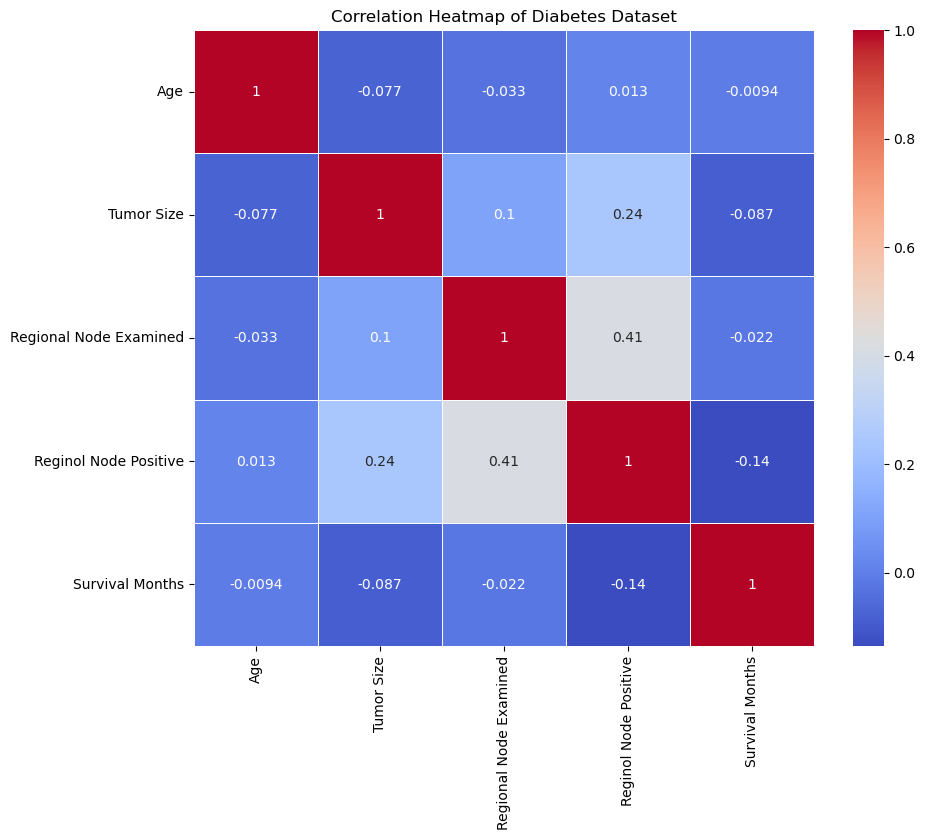

In [16]:
# Menghitung korelasi
corr_matrix = df.corr()

# Membuat heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Menambahkan judul
plt.title('Correlation Heatmap of Diabetes Dataset')
plt.show()



In [22]:
X = df.drop('Age', axis=1)
y = df['Age']

# Membagi data menjadi data latih (80%) dan data uji (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
#a

clf_entro = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state = 0)
clf_entro

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [29]:
#c
print('Model accuracy score with criterion entropy: {0:0.4f}'.format(accuracy_score(y_test, y_pred_en))) #print hasil akurasi

Model accuracy score with criterion entropy: 0.8609


In [30]:
#d
# print the scores on training and test set
print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.8609


[Text(0.4346612247164861, 0.9782608695652174, 'x[4] <= 47.5\ngini = 0.261\nsamples = 3219\nvalue = [2723, 496]'),
 Text(0.10329214624238321, 0.9347826086956522, 'x[0] <= 54.5\ngini = 0.412\nsamples = 386\nvalue = [112, 274]'),
 Text(0.041384563303994586, 0.8913043478260869, 'x[1] <= 15.5\ngini = 0.49\nsamples = 201\nvalue = [86, 115]'),
 Text(0.017603249830737983, 0.8478260869565217, 'x[15] <= 0.5\ngini = 0.305\nsamples = 32\nvalue = [26, 6]'),
 Text(0.010832769126607989, 0.8043478260869565, 'x[2] <= 5.5\ngini = 0.198\nsamples = 27\nvalue = [24, 3]'),
 Text(0.005416384563303994, 0.7608695652173914, 'x[25] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.002708192281651997, 0.717391304347826, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.008124576844955992, 0.717391304347826, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.016249153689911984, 0.7608695652173914, 'x[12] <= 0.5\ngini = 0.08\nsamples = 24\nvalue = [23, 1]'),
 Text(0.013540961408259987, 0.7173913043478

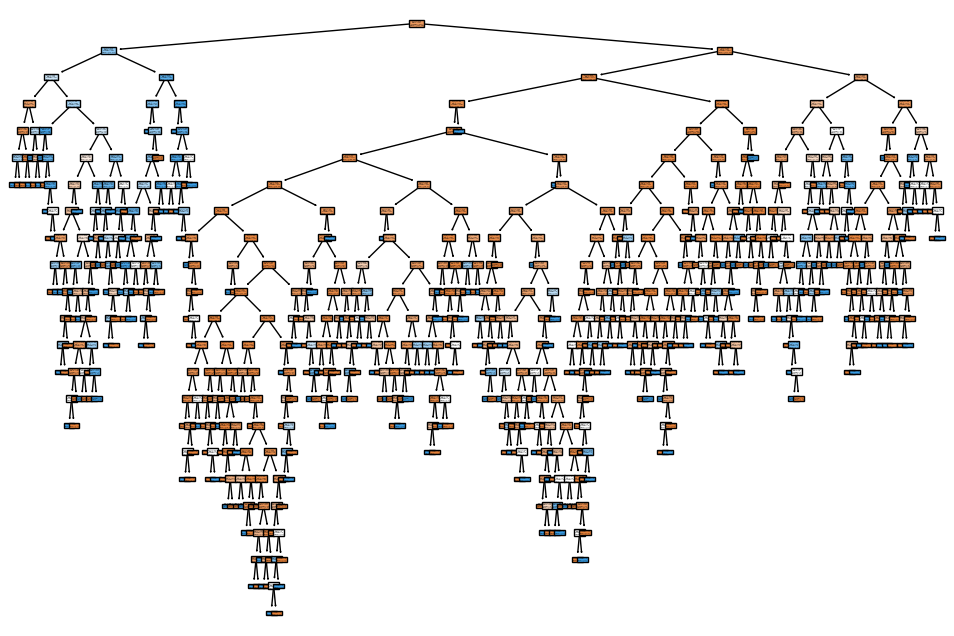

In [33]:
#e
plt.figure(figsize=(12,8))
tree.plot_tree(clf_en.fit(X_train, y_train), filled=True) #Membuat tree yang ada warnanya

In [35]:
#f
#Untuk membuat confusion matrix
cm = confusion_matrix(y_test, y_pred_en) #Untuk membuat confusion matrix
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[627  58]
 [ 54  66]]


In [36]:
#g
##untuk membuat dan print classificaton report
print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

       Alive       0.92      0.92      0.92       685
        Dead       0.53      0.55      0.54       120

    accuracy                           0.86       805
   macro avg       0.73      0.73      0.73       805
weighted avg       0.86      0.86      0.86       805



In [37]:
#GINI
#a

# instantiate the DecisionTreeClassifier model with criterion gini index
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [38]:
#b
y_pred_gini = clf_gini.predict(X_test)  #untuk mendapatkan hasil prediksi tentang spesies penguin dari data pengujian menggunakan gini

In [39]:
#c
print('Model accuracy score with criterion gini: {0:0.4f}'.format(accuracy_score(y_test, y_pred_gini))) #Untuk print hasil akurasi

Model accuracy score with criterion gini: 0.9081


In [40]:
#d
# print the scores on training and test set
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.9025
Test set score: 0.9081


[Text(0.5, 0.875, 'x[4] <= 47.5\ngini = 0.261\nsamples = 3219\nvalue = [2723, 496]'),
 Text(0.25, 0.625, 'x[0] <= 54.5\ngini = 0.412\nsamples = 386\nvalue = [112, 274]'),
 Text(0.125, 0.375, 'x[1] <= 15.5\ngini = 0.49\nsamples = 201\nvalue = [86, 115]'),
 Text(0.0625, 0.125, 'gini = 0.305\nsamples = 32\nvalue = [26, 6]'),
 Text(0.1875, 0.125, 'gini = 0.458\nsamples = 169\nvalue = [60, 109]'),
 Text(0.375, 0.375, 'x[0] <= 61.5\ngini = 0.242\nsamples = 185\nvalue = [26, 159]'),
 Text(0.3125, 0.125, 'gini = 0.375\nsamples = 84\nvalue = [21, 63]'),
 Text(0.4375, 0.125, 'gini = 0.094\nsamples = 101\nvalue = [5, 96]'),
 Text(0.75, 0.625, 'x[3] <= 8.5\ngini = 0.144\nsamples = 2833\nvalue = [2611, 222]'),
 Text(0.625, 0.375, 'x[4] <= 82.5\ngini = 0.115\nsamples = 2478\nvalue = [2326, 152]'),
 Text(0.5625, 0.125, 'gini = 0.148\nsamples = 1488\nvalue = [1368, 120]'),
 Text(0.6875, 0.125, 'gini = 0.063\nsamples = 990\nvalue = [958, 32]'),
 Text(0.875, 0.375, 'x[4] <= 68.5\ngini = 0.317\nsamples =

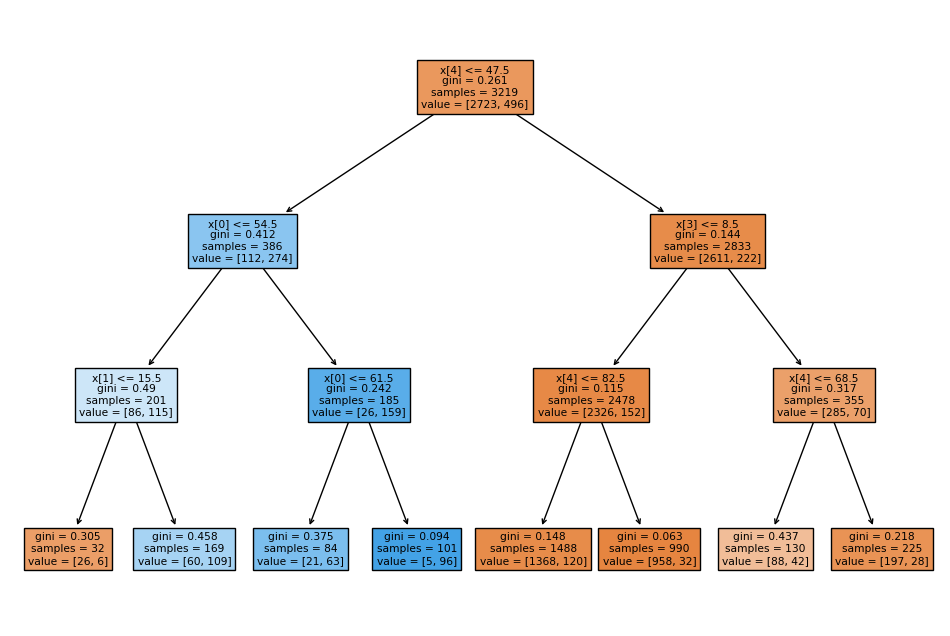

In [41]:
#e
plt.figure(figsize=(12,8))
tree.plot_tree(clf_gini.fit(X_train, y_train), filled=True) #membuat dan menujukan tree

In [42]:
#f
#Untuk membuat confusion matrix

cm = confusion_matrix(y_test, y_pred_gini)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[668  17]
 [ 57  63]]


In [43]:
#g
#untuk membuat dan print classificaton report
print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

       Alive       0.92      0.98      0.95       685
        Dead       0.79      0.53      0.63       120

    accuracy                           0.91       805
   macro avg       0.85      0.75      0.79       805
weighted avg       0.90      0.91      0.90       805



**Naive Bayes**

In [44]:
df.dropna(inplace=True)

In [45]:
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [47]:
X = df.drop('Age', axis=1)  # Features
y = df['Age']  # Target variable

In [48]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("Number of missing values in X:", X.isnull().sum().sum())
print("Number of missing values in y:", y.isnull().sum())
print(X.head())
print(y.head())

Shape of X: (4024, 15)
Shape of y: (4024,)
Number of missing values in X: 0
Number of missing values in y: 0
   Race  Marital Status  T Stage  N Stage  6th Stage  differentiate  Grade  \
0     2               1        0        0          0              1      3   
1     2               1        1        1          2              0      2   
2     2               0        2        2          4              0      2   
3     2               1        0        0          0              1      3   
4     2               1        1        0          1              1      3   

   A Stage  Tumor Size  Estrogen Status  Progesterone Status  \
0        1           4                1                    1   
1        1          35                1                    1   
2        1          63                1                    1   
3        1          18                1                    1   
4        1          41                1                    1   

   Regional Node Examined  Reginol No

In [49]:
nb_classifier = GaussianNB()  # Instantiate the classifier
nb_classifier.fit(X_train, y_train)  # Train the classifier

GaussianNB()

In [50]:
#b
nb_y_pred = nb_classifier.predict(X_test) # untuk memprediksi label (target) menggunakan model Naive Bayes yang telah dilatih sebelumnya (nb_classifier).

In [51]:
#c
cm = confusion_matrix(y_test, nb_y_pred) #Untuk membuat confussion matrix dari nb
print("Confusion Matrix:\n", cm)

#d
print('Accuracy Score: {0:0.4f}'.format(accuracy_score(y_test, nb_y_pred))) #Untuk menujukan hasil akurasi

Confusion Matrix:
 [[615  70]
 [ 65  55]]
Accuracy Score: 0.8323


In [52]:
#e
print(classification_report(y_test, nb_y_pred)) #Untuk print classification report

              precision    recall  f1-score   support

       Alive       0.90      0.90      0.90       685
        Dead       0.44      0.46      0.45       120

    accuracy                           0.83       805
   macro avg       0.67      0.68      0.68       805
weighted avg       0.84      0.83      0.83       805



In [53]:
# Metode Logistic regresion
# a
classifier = LogisticRegression(max_iter=200)
classifier.fit(X_train, y_train)  # membuat model logisticc regresion

C:\Users\Michelle\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200)

In [59]:
# b
y_pred_log = classifier.predict(X_test) # membuat prediksi
comparison_table = pd.DataFrame({"y_test": y_test, "y_pred": y_pred_log})
comparison_table.head() # menampilkan 5 baris pertama dari DataFrame

,y_test,y_pred
1718,Alive,Alive
1204,Alive,Alive
2722,Alive,Alive
1937,Dead,Alive
1226,Alive,Alive


In [60]:
#c
print('Accuracy Score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_log))) # print hasil accuracy score

Accuracy Score: 0.9006


In [61]:
# d
cmatrix = confusion_matrix(y_test, y_pred_log)  #untuk membuat matrix
print("Confusion Matrix:\n", cmatrix)

Confusion Matrix:
 [[674  11]
 [ 69  51]]


In [62]:
# e
print (classification_report (y_test, y_pred_log)) # print hasil classification report

              precision    recall  f1-score   support

       Alive       0.91      0.98      0.94       685
        Dead       0.82      0.42      0.56       120

    accuracy                           0.90       805
   macro avg       0.86      0.70      0.75       805
weighted avg       0.89      0.90      0.89       805

